In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
Customer = pd.read_csv('Customer.csv')
Transaction = pd.read_csv('Transactions.csv')
Product_Heirarchy = pd.read_csv('prod_cat_info.csv')

#### Changing date to proper date format

In [4]:
Customer['DOB']  = pd.to_datetime(Customer['DOB'], format = '%d-%m-%Y')
Transaction['tran_date'] = pd.to_datetime(Transaction['tran_date'], format = '%d-%m-%Y')

 #### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [5]:
Merge_Cust_Trans = pd.merge(left = Transaction, right = Customer , how = 'left', left_on = 'cust_id', right_on = 'customer_Id')
Merge_Cust_Trans.pop('customer_Id')
Merge_Cust_Trans.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0


In [6]:
Customer_Final = pd.merge(left = Merge_Cust_Trans , right = Product_Heirarchy, how = 'left', left_on = 'prod_cat_code', right_on = 'prod_cat_code' )
Customer_Final.pop('prod_subcat_code')
Customer_Final.head(3)


,transaction_id,cust_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,-5,-772,405.3,-4265.3,e-Shop,1981-09-26,M,5.0,Clothing,4,Mens
1,80712190438,270351,2014-02-28,1,-5,-772,405.3,-4265.3,e-Shop,1981-09-26,M,5.0,Clothing,1,Women
2,80712190438,270351,2014-02-28,1,-5,-772,405.3,-4265.3,e-Shop,1981-09-26,M,5.0,Clothing,3,Kids


#### 2. Prepare a summary report for the merged data set.

In [7]:
 #a. Get the column names and their corresponding data types
Customer_Final.dtypes

transaction_id                int64
cust_id                       int64
tran_date            datetime64[ns]
prod_cat_code                 int64
Qty                           int64
Rate                          int64
Tax                         float64
total_amt                   float64
Store_type                   object
DOB                  datetime64[ns]
Gender                       object
city_code                   float64
prod_cat                     object
prod_sub_cat_code             int64
prod_subcat                  object
dtype: object

In [8]:
#b. i. Top 10 observations

Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
0,80712190438,270351,2014-02-28,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,4,Mens
1,80712190438,270351,2014-02-28,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,1,Women
2,80712190438,270351,2014-02-28,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,3,Kids
3,29258453508,270384,2014-02-27,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,Electronics,4,Mobiles
4,29258453508,270384,2014-02-27,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,Electronics,5,Computers
5,29258453508,270384,2014-02-27,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,Electronics,8,Personal Appliances
6,29258453508,270384,2014-02-27,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,Electronics,9,Cameras
7,29258453508,270384,2014-02-27,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,Electronics,10,Audio and video
8,51750724947,273420,2014-02-24,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,7,Fiction
9,51750724947,273420,2014-02-24,5,-2,-791,166.110,-1748.110,TeleShop,1992-07-27,M,8.0,Books,12,Academic


In [9]:
# b.  ii. Bottom 10 observations

Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat
99283,72870271171,270911,2011-01-25,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,10,Non-Fiction
99284,72870271171,270911,2011-01-25,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,11,Children
99285,72870271171,270911,2011-01-25,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,3,Comics
99286,72870271171,270911,2011-01-25,5,3,1142,359.730,3785.730,TeleShop,1970-05-22,M,2.0,Books,6,DIY
99287,77960931771,271961,2011-01-25,5,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,7,Fiction
99288,77960931771,271961,2011-01-25,5,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,12,Academic
99289,77960931771,271961,2011-01-25,5,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,10,Non-Fiction
99290,77960931771,271961,2011-01-25,5,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,11,Children
99291,77960931771,271961,2011-01-25,5,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,3,Comics
99292,77960931771,271961,2011-01-25,5,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,6,DIY


In [10]:
#c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

Summary = Customer_Final.describe().T
Five_number_summary = Summary[['min','max','25%','50%','75%']]
Five_number_summary

,min,max,25%,50%,75%
transaction_id,3268991.000,9.998755e+10,2.492150e+10,5.011083e+10,7.528121e+10
cust_id,266783.000,2.752650e+05,2.689560e+05,2.709820e+05,2.731200e+05
prod_cat_code,1.000,6.000000e+00,3.000000e+00,5.000000e+00,5.000000e+00
Qty,-5.000,5.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00
Rate,-1499.000,1.500000e+03,3.130000e+02,7.130000e+02,1.109000e+03
Tax,7.350,7.875000e+02,9.828000e+01,1.999200e+02,3.669750e+02
total_amt,-8270.925,8.287500e+03,7.624500e+02,1.761370e+03,3.585725e+03
city_code,1.000,1.000000e+01,3.000000e+00,5.000000e+00,8.000000e+00
prod_sub_cat_code,1.000,1.200000e+01,4.000000e+00,7.000000e+00,1.000000e+01


In [11]:
#d. Frequency tables for all the categorical variables
for col in Customer_Final.columns:
      if Customer_Final[col].dtype=='object':
            print(Customer_Final[col].value_counts())

e-Shop            40185
MBR               19974
Flagship store    19814
TeleShop          19320
Name: Store_type, dtype: int64
M    51051
F    48202
Name: Gender, dtype: int64
Books               36414
Electronics         24490
Home and kitchen    16516
Footwear             8997
Clothing             8880
Bags                 3996
Name: prod_cat, dtype: int64
Mens                   7957
Women                  7957
Fiction                6069
DIY                    6069
Comics                 6069
Children               6069
Non-Fiction            6069
Academic               6069
Kids                   5959
Audio and video        4898
Cameras                4898
Personal Appliances    4898
Computers              4898
Mobiles                4898
Furnishing             4129
Kitchen                4129
Bath                   4129
Tools                  4129
Name: prod_subcat, dtype: int64


#### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

array([[<AxesSubplot:title={'center':'transaction_id'}>,
        <AxesSubplot:title={'center':'cust_id'}>,
        <AxesSubplot:title={'center':'prod_cat_code'}>],
       [<AxesSubplot:title={'center':'Qty'}>,
        <AxesSubplot:title={'center':'Rate'}>,
        <AxesSubplot:title={'center':'Tax'}>],
       [<AxesSubplot:title={'center':'total_amt'}>,
        <AxesSubplot:title={'center':'city_code'}>,
        <AxesSubplot:title={'center':'prod_sub_cat_code'}>]], dtype=object)

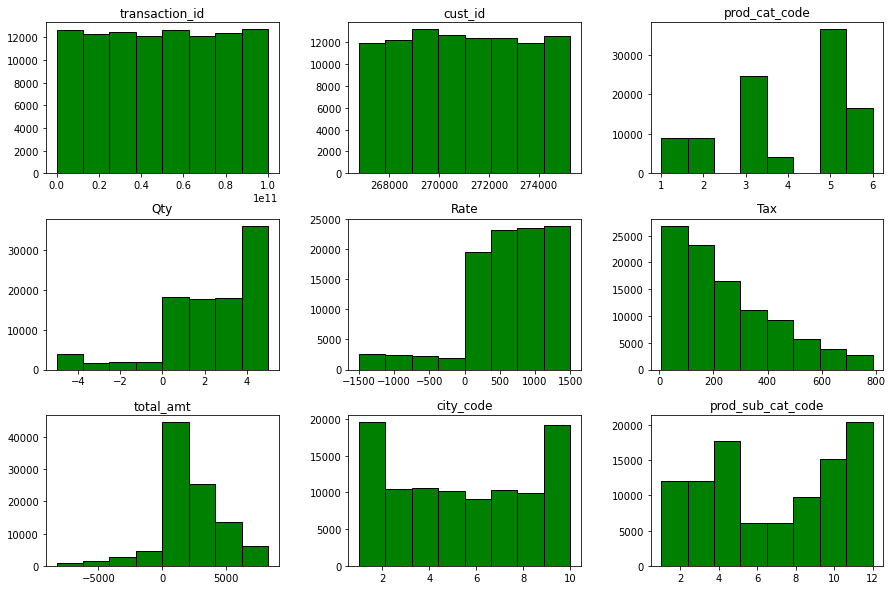

In [12]:
# Generate histograms for all continuous variables

Continuous_variables = Customer_Final.select_dtypes(['float64','int64'])
Continuous_variables.hist(figsize = (15,10), color = 'g', edgecolor = 'black', bins =8, grid = False)

In [13]:
# frequency bars for categorical variables.
Categorical_variables = Customer_Final.select_dtypes('object')
Categorical_variables

,Store_type,Gender,prod_cat,prod_subcat
0,e-Shop,M,Clothing,Mens
1,e-Shop,M,Clothing,Women
2,e-Shop,M,Clothing,Kids
3,e-Shop,F,Electronics,Mobiles
4,e-Shop,F,Electronics,Computers
...,...,...,...,...
99288,TeleShop,M,Books,Academic
99289,TeleShop,M,Books,Non-Fiction
99290,TeleShop,M,Books,Children
99291,TeleShop,M,Books,Comics


<AxesSubplot:>

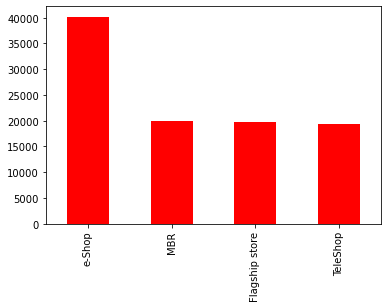

In [14]:
Categorical_variables['Store_type'].value_counts().plot(kind ='bar', color = 'r')

<AxesSubplot:>

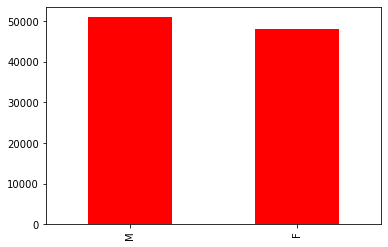

In [15]:
Categorical_variables['Gender'].value_counts().plot(kind ='bar', color = 'r')

<AxesSubplot:>

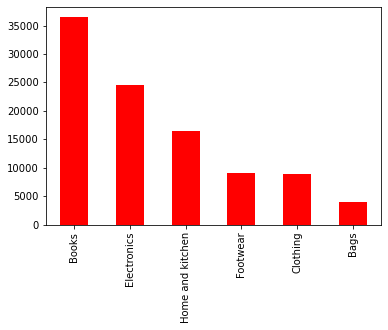

In [16]:
Categorical_variables['prod_cat'].value_counts().plot(kind ='bar', color = 'r')

<AxesSubplot:>

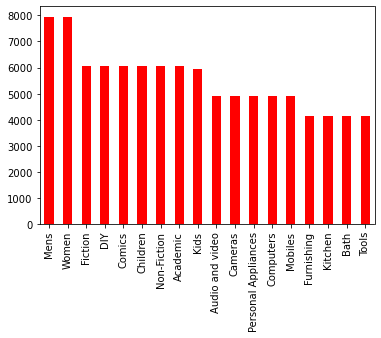

In [17]:
Categorical_variables['prod_subcat'].value_counts().plot(kind ='bar', color = 'r')

#### 4. Calculate the following information using the merged dataset :
          a. Time period of the available transaction data
          b. Count of transactions where the total amount of transaction was negative

In [18]:
# a. Time period of the available transaction data
Time_Period = Customer_Final.tran_date.iloc[0] - Customer_Final.tran_date.iloc[-1]
Time_Period

Timedelta('1130 days 00:00:00')

In [19]:
# b. Count of transactions where the total amount of transaction was negative
Count_Of_Transactions = Customer_Final.total_amt[Customer_Final.total_amt < 0].count()
Count_Of_Transactions

9294

#### 5. Analyze which product categories are more popular among females vs male customers.

In [20]:
pd.crosstab(index = Customer_Final['prod_cat'] , columns = Customer_Final['Gender'] )

Gender,F,M
prod_cat,,
Bags,1988,2008
Books,17694,18696
Clothing,4317,4554
Electronics,11640,12850
Footwear,4587,4407
Home and kitchen,7976,8536


#### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [21]:
City_code_max_cust = Customer_Final.groupby('city_code').cust_id.count().sort_values(ascending = False).reset_index()
City_code_max_cust.rename(columns = {'cust_id':'count_customers'}, inplace = True)
Sum = Customer_Final['cust_id'].count()
Percentage_Customer = ((City_code_max_cust['count_customers']/Sum)*100).reset_index()
Percentage_Customer.pop('index')
Percentage_Customer.rename(columns = {'count_customers':'Percent_Customers_In_City'},inplace = True)
City_code_max_cust= pd.concat([City_code_max_cust,Percentage_Customer],axis=1)
City_code_max_and_percent_cust = City_code_max_cust.iloc[0]
City_code_max_and_percent_cust

city_code                        4.000000
count_customers              10571.000000
Percent_Customers_In_City       10.646269
Name: 0, dtype: float64

#### 7. Which store type sells the maximum products by value and by quantity?

In [36]:
Customer_Final[['Store_type', 'total_amt', 'Qty']].sort_values(by = ['total_amt','Qty'], ascending = False).reset_index().drop(columns = 'index').head(10)

,Store_type,total_amt,Qty
0,e-Shop,8287.5,5
1,e-Shop,8287.5,5
2,e-Shop,8287.5,5
3,MBR,8287.5,5
4,MBR,8287.5,5
5,MBR,8287.5,5
6,MBR,8287.5,5
7,MBR,8287.5,5
8,TeleShop,8287.5,5
9,TeleShop,8287.5,5


#### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [140]:
Customer_Final.total_amt.where((Customer_Final.Store_type == 'Flagship store') & (Customer_Final.prod_cat.isin(['Clothing', 'Electronics']))).sum()

14658949.889999999

#### 9. What was the total amount earned from "Male" customers under the "Electronics" category

In [65]:
Customer_Final.total_amt.where( (Customer_Final.prod_cat == 'Electronics') & (Customer_Final.Gender == 'M')).sum()

28515547.124999996

#### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?


In [155]:
df = Customer_Final[(Customer_Final.total_amt > 0)]
Unique_Records = df.transaction_id.nunique()
Unique_Records

20876

#### 11. For all customers aged between 25 - 35, find out:
          a. What was the total amount spent for “Electronics” and “Books” product categories?
          b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?


In [159]:
Current_year = pd.to_datetime('today').year
Customer_Final['Age'] = (Current_year - Customer_Final.DOB.dt.year)
Customer_Final


,transaction_id,cust_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,DOB,Gender,city_code,prod_cat,prod_sub_cat_code,prod_subcat,Age
0,80712190438,270351,2014-02-28,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,4,Mens,41
1,80712190438,270351,2014-02-28,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,1,Women,41
2,80712190438,270351,2014-02-28,1,-5,-772,405.300,-4265.300,e-Shop,1981-09-26,M,5.0,Clothing,3,Kids,41
3,29258453508,270384,2014-02-27,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,Electronics,4,Mobiles,49
4,29258453508,270384,2014-02-27,3,-5,-1497,785.925,-8270.925,e-Shop,1973-05-11,F,8.0,Electronics,5,Computers,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99288,77960931771,271961,2011-01-25,5,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,12,Academic,40
99289,77960931771,271961,2011-01-25,5,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,10,Non-Fiction,40
99290,77960931771,271961,2011-01-25,5,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,11,Children,40
99291,77960931771,271961,2011-01-25,5,1,447,46.935,493.935,TeleShop,1982-01-15,M,1.0,Books,3,Comics,40


In [158]:
# a. What was the total amount spent for “Electronics” and “Books” product categories?

Customer_Final.total_amt.where( Customer_Final['Age'].between(25,35) & Cust_Final.prod_cat.isin(['Electronics','Books'])).sum()
                                           

33464099.56500001

In [162]:
# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?
Customer_Final.total_amt.where((Customer_Final['tran_date'] >= '2014-01-01') & (Customer_Final['tran_date'] <= '2014-03-01')).sum()


9626729.06